In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
df = pd.read_csv('train.csv')

In [29]:
a = df.corr()
a.sort_values(by='SalePrice',ascending=False).head()

,MSSubClass,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice
SalePrice,0.476982,0.696882,0.790982,0.619545,0.535370,0.426997,0.475241,0.682639,0.505503,0.635361,...,0.553851,0.659600,0.537672,0.466929,0.430770,0.535419,0.496031,0.692360,0.623431,1.000000
OverallQual,0.471136,0.667647,1.000000,0.665203,0.552825,0.449358,0.410238,0.726278,0.568969,0.644946,...,0.552153,0.673331,0.423438,0.396765,0.420713,0.574261,0.491404,0.628715,0.562022,0.790982
GrLivArea,0.347673,0.411751,0.593007,0.369635,0.325158,0.248026,0.389893,0.435986,0.282314,0.369656,...,0.613537,0.420563,0.809778,0.461679,0.292680,0.310591,0.319453,0.490960,0.468997,0.708624
Neighborhood,0.532233,1.000000,0.667647,0.683095,0.521638,0.400196,0.368029,0.631870,0.576118,0.629227,...,0.513701,0.566358,0.282979,0.315569,0.456575,0.579489,0.466576,0.585252,0.529629,0.696882
GarageCars,0.397369,0.585252,0.628715,0.570728,0.433995,0.429343,0.404375,0.557218,0.458128,0.545306,...,0.476583,0.535777,0.399737,0.300840,0.264771,0.485292,0.365879,1.000000,0.865866,0.692360


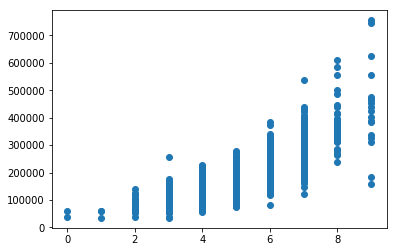

In [30]:
#相関係数が一番高いOverallQualに着目、グラフにする。
X = np.array(df.loc[:, ['OverallQual']])
y1 = np.array(df.loc[:, ['SalePrice']])
plt.scatter(X, y1)                  
plt.show()                        

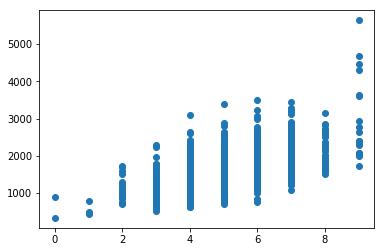

In [31]:
#二番目に高いGrLivAreaに着目、こちらもグラフにする。
y2 = np.array(df.loc[:,["GrLivArea"]])
plt.scatter(X,y2)
plt.show()

In [9]:
#OverallQualだけで線形回帰する。性能を見る。
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.3, random_state = 0)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y1_train)

In [12]:
print('R^2')
print('train: %.3f' % lr.score(X_train, y1_train))
print('test : %.3f' % lr.score(X_test, y1_test))

R^2
train: 0.615
test : 0.648


In [33]:
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y1_train), len(y1_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y1_test), len(y1_test), 2))

adjusted R^2
train: 0.723737
test : 0.688849


In [15]:
#GrLivAreaも使って重回帰分析する。
X = df.loc[:, ['OverallQual', 'GrLivArea']].values
y = df.loc[:, ['SalePrice']].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
print('R^2')
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

R^2
train: 0.724
test : 0.690


In [22]:
#重回帰分析した結果をcsvファイルで出力
dftest = pd.read_csv('test.csv')
Xnew = dftest.loc[:, ['OverallQual', 'GrLivArea']].values
y_pred = lr.predict(Xnew)
y_pred = y_pred.reshape(-1)
a =[i for i in range(1461,2920)]
df1 = pd.DataFrame({'SalePrice':y_pred,'Id': a})
df1.to_csv("pred.csv")